### Expolatory Data Analysis (EDA)

In [1]:
import json
# import libraries
import json
import re
import nltk;
from nltk.stem import PorterStemmer;
nltk.download('vader_lexicon');
from nltk.sentiment import SentimentIntensityAnalyzer;
from nltk.tokenize import word_tokenize;
from nltk.tokenize import RegexpTokenizer;
from nltk.corpus import stopwords;
from nltk.stem import WordNetLemmatizer;
nltk.download('wordnet');
from nltk import bigrams, trigrams, FreqDist;
nltk.download('stopwords');
nltk.download('averaged_perceptron_tagger');
nltk.download('punkt');
from collections import Counter;
import numpy as np
!pip install wordcloud;
from scipy import stats
import statistics
import matplotlib.pyplot as plt;

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# loading the data
with open('../Final_Intents.json', 'r') as file:
    intents = json.load(file)

In [3]:
# Function to process and analyze the data for display
def process_intents(intents):
    for intent in intents:
        print(f"Intent: {intent.get('tag', 'No tag available')}")
        if 'questions' in intent:
            print("Questions:")
            for question in intent['questions']:
                print(f" - {question}")
        else:
            print("Questions: No questions available")

        if 'responses' in intent:
            print("Responses:")
            for response in intent['responses']:
                print(f" - {response}")
        else:
            print("Responses: No responses available")
        print("\n")

# Call the function with your intents list
process_intents(intents)

Intent: cloud_computing
Questions:
 - What is the fundamental starting point for understanding Cloud Computing?
 - How does Moringa School introduce the concept of Cloud Computing?
 - Why is Cloud Computing considered essential in the real world?
 - Can you provide an overview of the Cloud Computing program at Moringa School?
 - What are the eligibility requirements for the Cloud Computing program?
 - How long do students need to dedicate to succeed in the Cloud Computing course?
 - What unique learning experiences does Moringa School offer in Cloud Computing?
 - How is the curriculum at Moringa School tailored to market-aligned skills in Cloud Computing?
 - What specific areas does the Cloud Computing course cover, such as security and architecture?
 - In what ways does Moringa School guarantee a comprehensive understanding of AWS Cloud?
Responses:
 - The fundamental starting point for understanding Cloud Computing is to recognize it as a pivotal element in modern IT, enabling the del

#### Text Preprocessing

In [4]:
# Normalization: Convert text to lowercase
normalized_questions = [question.lower() for intent in intents for question in intent['questions']]
# Display the first few normalized questions
print("Normalized Questions (Sample):", normalized_questions[:5])

Normalized Questions (Sample): ['what is the fundamental starting point for understanding cloud computing?', 'how does moringa school introduce the concept of cloud computing?', 'why is cloud computing considered essential in the real world?', 'can you provide an overview of the cloud computing program at moringa school?', 'what are the eligibility requirements for the cloud computing program?']


In [5]:
# Removing punctuation and special characters
cleaned_questions = [re.sub(r'[^\w\s]', '', question) for question in normalized_questions]
print("Cleaned Questions (Sample):", cleaned_questions[:5])

Cleaned Questions (Sample): ['what is the fundamental starting point for understanding cloud computing', 'how does moringa school introduce the concept of cloud computing', 'why is cloud computing considered essential in the real world', 'can you provide an overview of the cloud computing program at moringa school', 'what are the eligibility requirements for the cloud computing program']


In [6]:
# Tokenization: Break text into words
tokenized_questions = [question.split() for question in cleaned_questions]
# Display the first few tokenized questions
print("Tokenized Questions (Sample):", tokenized_questions[:5])

Tokenized Questions (Sample): [['what', 'is', 'the', 'fundamental', 'starting', 'point', 'for', 'understanding', 'cloud', 'computing'], ['how', 'does', 'moringa', 'school', 'introduce', 'the', 'concept', 'of', 'cloud', 'computing'], ['why', 'is', 'cloud', 'computing', 'considered', 'essential', 'in', 'the', 'real', 'world'], ['can', 'you', 'provide', 'an', 'overview', 'of', 'the', 'cloud', 'computing', 'program', 'at', 'moringa', 'school'], ['what', 'are', 'the', 'eligibility', 'requirements', 'for', 'the', 'cloud', 'computing', 'program']]


In [7]:
# Stop words removal
stop_words = set(stopwords.words('english'))
filtered_words = [[word for word in question if word not in stop_words] for question in tokenized_questions]
# Display the first few sets of filtered words
print("Filtered Words (Sample):", filtered_words[:5])


Filtered Words (Sample): [['fundamental', 'starting', 'point', 'understanding', 'cloud', 'computing'], ['moringa', 'school', 'introduce', 'concept', 'cloud', 'computing'], ['cloud', 'computing', 'considered', 'essential', 'real', 'world'], ['provide', 'overview', 'cloud', 'computing', 'program', 'moringa', 'school'], ['eligibility', 'requirements', 'cloud', 'computing', 'program']]


In [8]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [[lemmatizer.lemmatize(word) for word in question] for question in filtered_words]

print("Lemmatized Words (Sample):", lemmatized_words[:5])

Lemmatized Words (Sample): [['fundamental', 'starting', 'point', 'understanding', 'cloud', 'computing'], ['moringa', 'school', 'introduce', 'concept', 'cloud', 'computing'], ['cloud', 'computing', 'considered', 'essential', 'real', 'world'], ['provide', 'overview', 'cloud', 'computing', 'program', 'moringa', 'school'], ['eligibility', 'requirement', 'cloud', 'computing', 'program']]


In [9]:
# Stemming
stemmer = PorterStemmer()
stemmed_words = [[stemmer.stem(word) for word in question] for question in filtered_words]
# Display the first few sets of stemmed words
print("Stemmed Words (Sample):", stemmed_words[:5])

Stemmed Words (Sample): [['fundament', 'start', 'point', 'understand', 'cloud', 'comput'], ['moringa', 'school', 'introduc', 'concept', 'cloud', 'comput'], ['cloud', 'comput', 'consid', 'essenti', 'real', 'world'], ['provid', 'overview', 'cloud', 'comput', 'program', 'moringa', 'school'], ['elig', 'requir', 'cloud', 'comput', 'program']]


## EDA
#### Intent distribution
We analyze the frequency of different intents. This can help use understand which topics are more common and might require more training data or refined responses.


In [10]:
# Statistics for the intents
intent_counts = {intent['tag']: len(intent['questions']) for intent in intents}

# Calculate additional statistics
mean_questions_per_intent = sum(intent_counts.values()) / len(intent_counts)
median_questions_per_intent = sorted(intent_counts.values())[len(intent_counts) // 2]
total_intents = len(intent_counts)

# Find the intent(s) with the fewest questions
min_questions_count = min(intent_counts.values())
intents_with_fewest_questions = [intent for intent, count in intent_counts.items() if count == min_questions_count]

# Print the calculated statistics
print(f"Total Intents: {total_intents}")
print(f"Mean Questions per Intent: {mean_questions_per_intent:.2f}")
print(f"Median Questions per Intent: {median_questions_per_intent}")
print(f"Intent(s) with Fewest Questions ({min_questions_count} questions): {', '.join(intents_with_fewest_questions)}")

Total Intents: 75
Mean Questions per Intent: 8.69
Median Questions per Intent: 10
Intent(s) with Fewest Questions (5 questions): Data_Science_Industry_Relevance, Data_Science_Software_Engineering_Fundamentals, Data_Science_Online_and_Offline_Learning_Modes, Data_Science_Student_Support_Services, Data_Science_Certification_and_Accreditation, Data_Science_Application_Process, Student_Life_and_Break_Periods, Data_Science_Cybersecurity_Introduction, Data_Science_Applications_in_Business, Ethical_Considerations_in_Data_Science, Data_Science_Collaborative_Projects_and_Teamwork, Data_Science_Career_Transition_Support, International_Student_Information, Data_Ethics_and_Privacy, Advanced_Data_Science_Topics, Enrollment_Deadlines, Data_Science_Course_Pacing_and_Flexibility, Data_Science_Competitions_and_Challenges


* Findings;
* There are a total of 75 unique intents in the dataset. Each intent represents a specific category or topic.
* On average, each intent contains approximately 8.69 questions. This statistic provides an understanding of the typical number of questions associated with each intent.
* The median number of questions per intent is 10. This indicates that half of the intents have 10 or fewer questions, while the other half has more than 10 questions. The median offers insight into the central tendency of question counts.
* There are several intents that have the fewest questions, each containing only 5 questions. These intents may represent topics or categories with relatively less content or focus compared to others.

##### Visualizing the First 10 and Last 10 Intents by Number of Questions

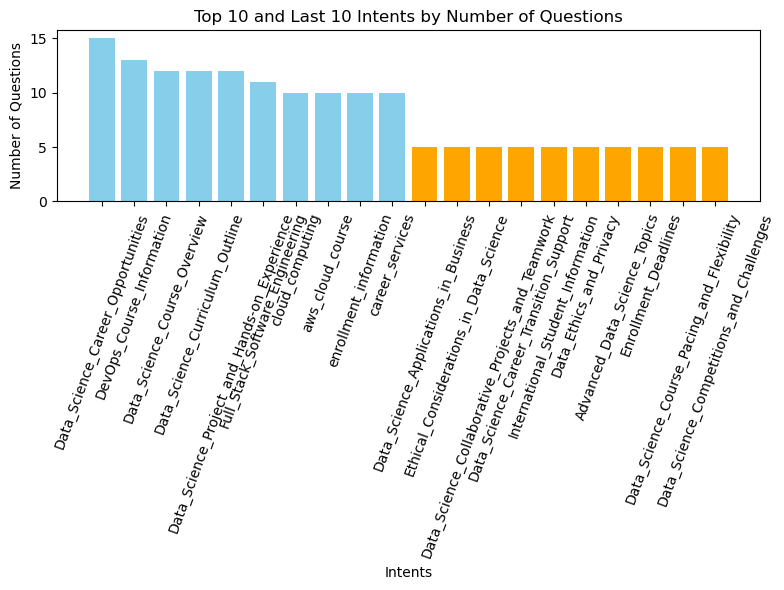

In [11]:
# Sort intents by question count
sorted_intents = sorted(intent_counts.items(), key=lambda item: item[1], reverse=True)

# Extract top 10 and last 10 intents
top_10_intents = sorted_intents[:10]
last_10_intents = sorted_intents[-10:]
combined_intents = top_10_intents + last_10_intents

# Unpack the combined intents for plotting
tags, counts = zip(*combined_intents)

# Bar Chart for Top 10 and Last 10 Intent Counts
plt.figure(figsize=(8, 6))
plt.bar(tags, counts, color=['skyblue']*10 + ['orange']*10)
plt.xlabel('Intents')
plt.ylabel('Number of Questions')
plt.xticks(rotation=70)
plt.title('Top 10 and Last 10 Intents by Number of Questions')
plt.tight_layout()
plt.show ()

###  Question and Response Length Analysis

In [12]:
# Calculate the lengths of questions in all intents
question_lengths = [len(question.split()) for intent in intents for question in intent['questions']]
response_lengths = [len(response.split()) for intent in intents for response in intent.get('responses', [])]
# Calculate the mean, median, and standard deviation for question lengths
question_mean = statistics.mean(question_lengths)
question_median = statistics.median(question_lengths)
question_std_dev = statistics.stdev(question_lengths)

# Calculate the mean, median, and standard deviation for response lengths
response_mean = statistics.mean(response_lengths)
response_median = statistics.median(response_lengths)
response_std_dev = statistics.stdev(response_lengths)

# Print the statistics
print("Statistics for Question Lengths:")
print(f"Mean: {question_mean}")
print(f"Median: {question_median}")
print(f"Standard Deviation: {question_std_dev}")
print("\n")
print("Statistics for Response Lengths:")
print(f"Mean: {response_mean}")
print(f"Median: {response_median}")
print(f"Standard Deviation: {response_std_dev}")

Statistics for Question Lengths:
Mean: 10.484662576687116
Median: 10.0
Standard Deviation: 2.7336573819097265


Statistics for Response Lengths:
Mean: 21.167218543046356
Median: 20.0
Standard Deviation: 10.676620893805165


Questions: The statistics for question lengths show that, on average, questions are relatively short (around 10 words), with a moderate level of variability.
Responses: In contrast, responses are longer on average (around 21 words), with greater variability in their lengths.

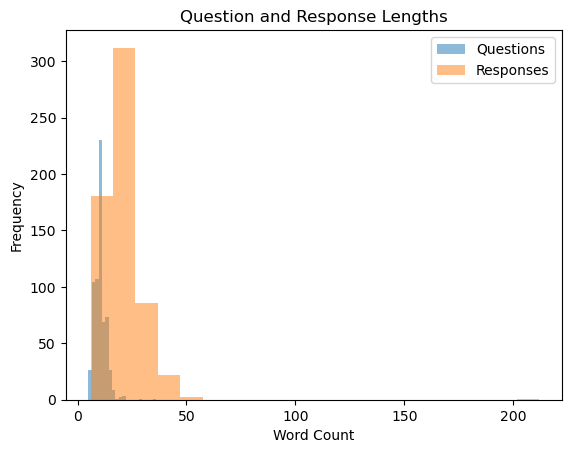

In [13]:
# Displaying the length of questions and responses
question_lengths = [len(question.split()) for intent in intents for question in intent['questions']]
response_lengths = [len(response.split()) for intent in intents for response in intent.get('responses', [])]
import matplotlib.pyplot as plt
plt.hist(question_lengths, bins=20, alpha=0.5, label='Questions')
plt.hist(response_lengths, bins=20, alpha=0.5, label='Responses')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.title('Question and Response Lengths')
plt.show()

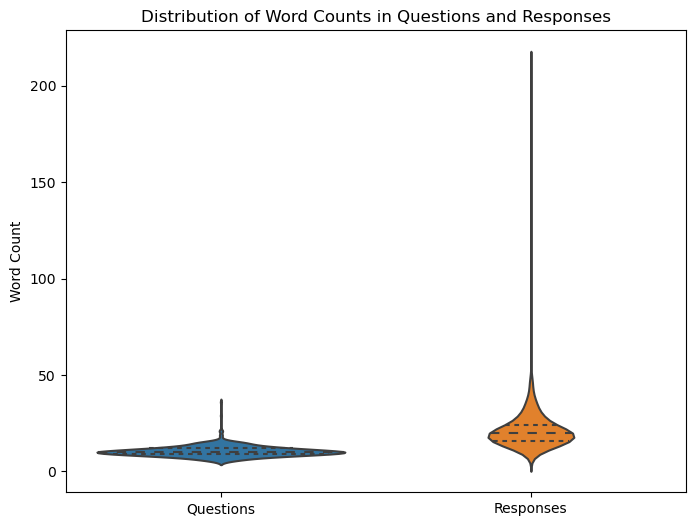

In [14]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(data=[question_lengths, response_lengths], inner="quartile")
plt.xticks([0, 1], ['Questions', 'Responses'])
plt.ylabel('Word Count')
plt.title('Distribution of Word Counts in Questions and Responses')
plt.show()

### Word Frequency Analysis
** Identify the most common words

In [15]:
# Calculating word frequency
all_words = [word for question in stemmed_words for word in question]  # Flatten the list
word_freq = Counter(all_words)

# Display the most common words
print("Most Common Words:", word_freq.most_common(20))

Most Common Words: [('cours', 231), ('data', 160), ('scienc', 137), ('moringa', 132), ('school', 129), ('student', 90), ('learn', 59), ('develop', 59), ('program', 51), ('provid', 50), ('enrol', 44), ('project', 40), ('mobil', 39), ('cloud', 34), ('cover', 34), ('curriculum', 33), ('avail', 33), ('opportun', 32), ('complet', 31), ('skill', 30)]


* findings;
* The analysis provides insights into the key themes and topics present in the dataset.
* The most common words reflect a strong emphasis on courses, data science, Moringa, and educational aspects.
* With 'cours' being the most frequent word, the dataset places a substantial emphasis on educational offerings.
* 'data,' 'scienc,' and 'moringa' indicate a strong focus on data science education, aligning with industry and institutional themes.
* The repetition of terms like 'student,' 'develop,' and 'learn' underscores a learner-centric approach in the dataset.
* Understanding these frequently occurring words is valuable for gaining insights into the main subjects and focus areas of the dataset.

#### Visualizing Most Common Words

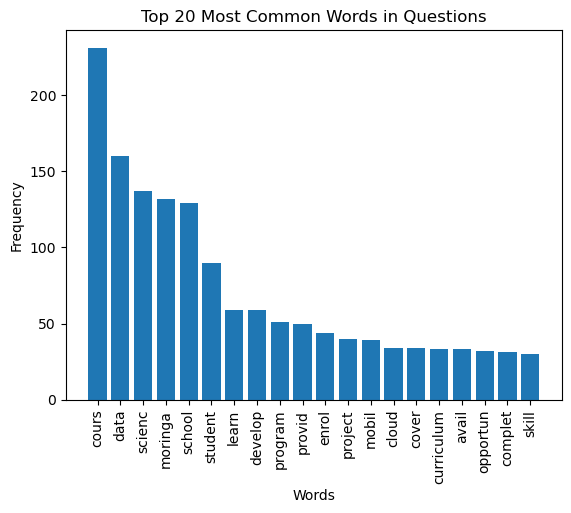

In [16]:
# Selecting the top 20 most common words
most_common_words = word_freq.most_common(20)
# Unpacking words and frequencies
words, frequencies = zip(*most_common_words)
# Plotting the bar chart for the most common words
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Words in Questions')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1924\86437026.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(words, rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1924\86437026.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(words, rotation=45, ha='right')


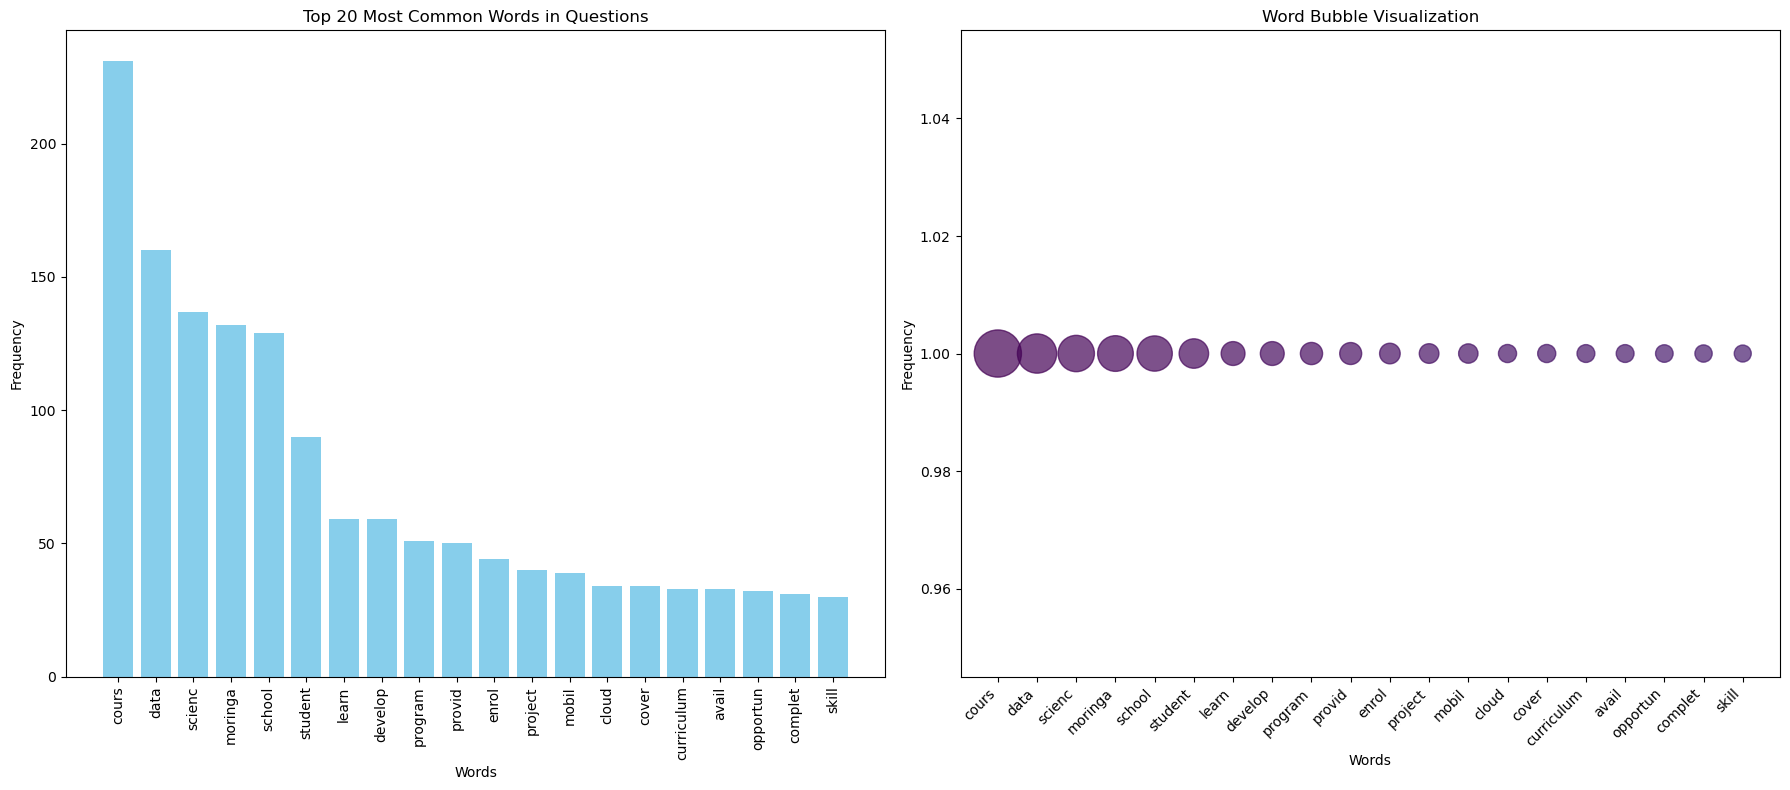

In [17]:
# Selecting the top 20 most common words
most_common_words = Counter(dict(word_freq)).most_common(20)
# Unpacking words and frequencies
words, frequencies = zip(*most_common_words)

# Creating subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Bar plot for the top 20 most common words
axes[0].bar(words, frequencies, color='skyblue')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(words, rotation=90)
axes[0].set_title('Top 20 Most Common Words in Questions')

# Bubble chart for the top 20 most common words
bubble_colors = [plt.cm.viridis(i) for i in range(len(words))]  # Use colormap for bubble colors
axes[1].scatter(words, [1]*len(words), s=[freq*5 for freq in frequencies], alpha=0.7, color=bubble_colors)
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Word Bubble Visualization')
axes[1].set_xticklabels(words, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show();

### Word Cloud for Most Common Words

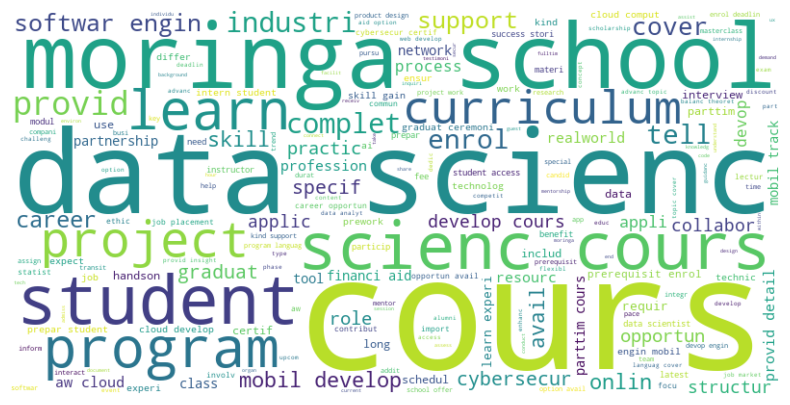

In [18]:
# Creating a word cloud for visualizing the most frequent words.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud
all_words_string = ' '.join([word for sublist in stemmed_words for word in sublist])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_words_string)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Bi-grams and Tri-grams Analysis
Analyze the most common bi-grams and tri-grams.

In [19]:
# Create bi-grams and tri-grams
bi_grams = list(bigrams(all_words))
tri_grams = list(trigrams(all_words))

# Frequency distribution
bi_gram_freq = FreqDist(bi_grams)
tri_gram_freq = FreqDist(tri_grams)

# Display most common bi-grams and tri-grams
print("Most Common Bi-grams:", bi_gram_freq.most_common(10))
print("Most Common Tri-grams:", tri_gram_freq.most_common(10))

Most Common Bi-grams: [(('data', 'scienc'), 136), (('moringa', 'school'), 128), (('scienc', 'cours'), 61), (('softwar', 'engin'), 23), (('mobil', 'develop'), 22), (('cours', 'moringa'), 17), (('develop', 'cours'), 17), (('aw', 'cloud'), 14), (('provid', 'detail'), 14), (('financi', 'aid'), 13)]
Most Common Tri-grams: [(('data', 'scienc', 'cours'), 61), (('cours', 'moringa', 'school'), 16), (('aw', 'cloud', 'cours'), 10), (('data', 'scienc', 'program'), 10), (('softwar', 'engin', 'mobil'), 9), (('engin', 'mobil', 'track'), 9), (('mobil', 'develop', 'cours'), 8), (('moringa', 'school', 'provid'), 7), (('enrol', 'moringa', 'school'), 7), (('career', 'opportun', 'avail'), 7)]


* Findings
* The most common bi-gram is 'data science' with a frequency of 136, indicating a strong association between these two words.
* 'Moringa school' is also highly frequent, suggesting a focus on education or programs related to Moringa School.
* In tri-grams, 'data science course' is the most common, reinforcing the emphasis on data science education.
* 'Moringa school' appears in both bi-grams and tri-grams, indicating its relevance and prominence in the dataset.
* Other terms like 'mobile development,' 'software engineering,' and 'financial aid' also stand out in the most common n-grams.





#### Visualizing the N-grams

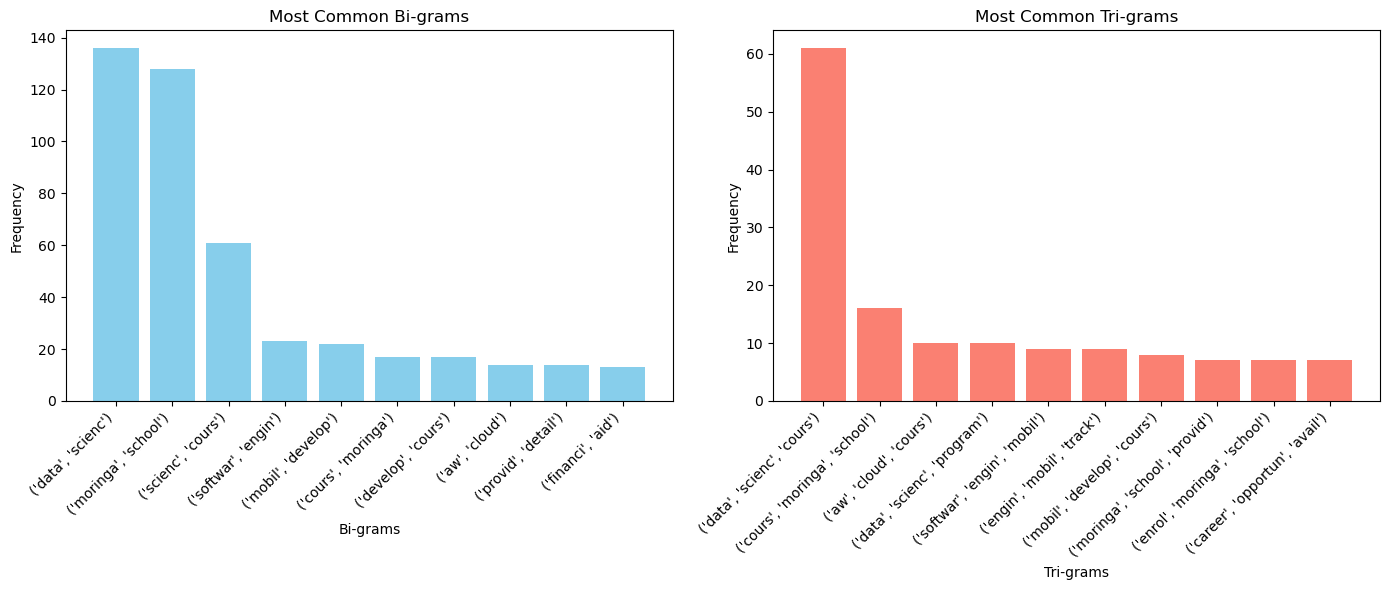

In [20]:
bi_gram_labels, bi_gram_counts = zip(*bi_gram_freq.most_common(10))

# Extracting labels and frequencies for tri-grams
tri_gram_labels, tri_gram_counts = zip(*tri_gram_freq.most_common(10))

# Plotting the bar plot with two columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot for bi-grams
ax1.bar(range(len(bi_gram_labels)), bi_gram_counts, color='skyblue')
ax1.set_xlabel('Bi-grams')
ax1.set_ylabel('Frequency')
ax1.set_xticks(range(len(bi_gram_labels)))
ax1.set_xticklabels(bi_gram_labels, rotation=45, ha='right')
ax1.set_title('Most Common Bi-grams')

# Bar plot for tri-grams
ax2.bar(range(len(tri_gram_labels)), tri_gram_counts, color='salmon')
ax2.set_xlabel('Tri-grams')
ax2.set_ylabel('Frequency')
ax2.set_xticks(range(len(tri_gram_labels)))
ax2.set_xticklabels(tri_gram_labels, rotation=45, ha='right')
ax2.set_title('Most Common Tri-grams')

# Adjust layout
plt.tight_layout()
plt.show()
